<a href="https://colab.research.google.com/github/byzkario105/BaitapAI/blob/main/TestNhandienHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Phân loại hoa(Cúc,thược dược, mặt trời, vạn thọ)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


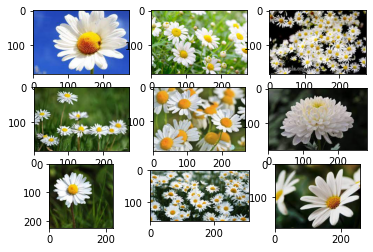

In [36]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'cuc.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [37]:
print(y_train)
print(y_test)

[]
[]


In [68]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Hoa/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc.'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mattroi.'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('thuocduoc.'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('vantho.'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10hoa_photos.npy', photos)
save('10hoa_labels.npy', labels)

(40, 150, 150, 3) (40,)


In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 2s 415ms/step - loss: 34547.8359 - accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - 2s 422ms/step - loss: 2147.1714 - accuracy: 0.7500
Epoch 3/50
2/2 [==============================] - 3s 641ms/step - loss: 6125.1499 - accuracy: 0.7500
Epoch 4/50
2/2 [==============================] - 3s 605ms/step - loss: 4054.4973 - accuracy: 0.7500
Epoch 5/50
2/2 [==============================] - 3s 393ms/step - loss: 1200.4194 - accuracy: 0.7750
Epoch 6/50
2/2 [==============================] - 2s 420ms/step - loss: 2436.1243 - accuracy: 0.2500
Epoch 7/50
2/2 [==============================] - 2s 415ms/step - loss: 485.3072 - accuracy: 0.3750
Epoch 8/50
2/2 [==============================] - 2s 354ms/step - loss: 146.9117 - accuracy: 0.7500
Epoch 9/50
2/2 [==============================] - 2s 379ms/step - loss: 166.3925 - accuracy: 0.7500
Epoch 10/50
2/2 [==============================] - 2s 370ms/step - loss: 84.4754 - accuracy: 

In [71]:
model.evaluate(photos,labels)

2/2 [==============================] - 1s 108ms/step - loss: 184.3669 - accuracy: 0.1250


[184.36692810058594, 0.125]

In [72]:
model.save('Cuc_Final.h5')

In [73]:
from keras.models import load_model
models=load_model('Cuc_Final.h5')

In [79]:
classes = ["HoaCuc","Hoamattroi","Hoathuocduoc","Hoavantho"]

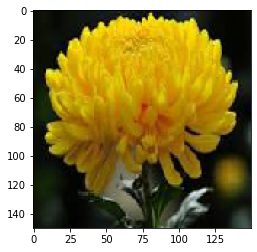

In [80]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/hoacuc.jpg', target_size=(150,150))
plt.imshow(img)

In [81]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.11901623 0.21713218 0.12103178 0.04791746 0.03989437 0.11875784
  0.05670697 0.11919343 0.10152567 0.05882412]]


'Hoamattroi'

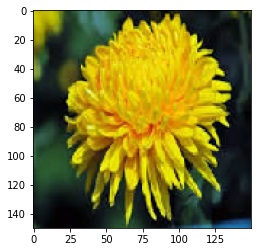

In [82]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/cuc1.jpg', target_size=(150,150))
plt.imshow(img)

In [85]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.1619883  0.10183692 0.07720389 0.05520964 0.05885341 0.18546
  0.04625886 0.20813431 0.07884938 0.02620515]]


IndexError: ignored